# Projet NLP : Détection des textes générés par l’IA : une approche d’analyse textuelle par les modèles de NLP

## Librairies

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
##Importation des libraires
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Partie modélisation
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 108.9 kB/s eta 0:01:58
     --------------------------------------- 0.0/12.8 MB 146.3 kB/s eta 0:01:28
     --------------------------------------- 0.1/12.8 MB 201.8 kB/s eta 0:01:04
     --------------------------------------- 0.1/12.8 MB 425.1 kB/s eta 0:00:30
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:10
     -- ------------------------------------- 0.7/12.8 MB 2.0 MB/s eta 0:00:07
     --- ------------------------------------ 1.1/12.8 MB 2.6 MB/s eta 0:00:05
     ---- ----------------------------------- 1.5/12.8 MB 3.4 MB/s eta 0:00:04
     ------ --------------------------------- 2.0/12.8 MB 3.9 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 4.7 MB/s et

In [ ]:
# Partie analyse de texte

import spacy
#nlp = spacy.load("en_core_web_sm")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords #stopwords
from nltk.tokenize import word_tokenize, sent_tokenize # tokenizing
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

nltk.download('stopwords')
stop_words=set(nltk.corpus.stopwords.words('english'))

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yavav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yavav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yavav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yavav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yavav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Importation et visualisation de la base de données

In [ ]:
import pandas as pd

try:
    df = pd.read_csv("C:/Users/yavav/Downloads/AI_Human.csv")
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    df = pd.read_csv("AI_Human.csv", on_bad_lines='skip', quoting=3)  # 3 = csv.QUOTE_NONE
    print("File loaded with problematic lines skipped.")

print(df.head(10))

                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0
5  The electrol college system is an unfair syste...        0.0
6  Dear state senator, It is the utmost respect t...        0.0
7  Fellow citizens, cars have become a major role...        0.0
8  "It's official: The electoral college is unfai...        0.0
9  The Electoral College has been kept for centur...        0.0


In [ ]:
df.shape

(487235, 2)

In [ ]:
print(df["generated"].value_counts())

0.0    305797
1.0    181438
Name: generated, dtype: int64


### Format des variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [ ]:
df["generated"] = df["generated"].astype(int)
df.head() #On transforme la colonne generated en integer

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


### Calcul du nombre de mots par texte

In [ ]:
# Création de la colonne 'nb_mots' (nombre de mots par texte)
df['nb_mots'] = df['text'].apply(lambda x: len(x.split()))

# Affichage des statistiques descriptives
print(df['nb_mots'].describe())

count    487235.000000
mean        393.096214
std         168.593328
min           0.000000
25%         278.000000
50%         363.000000
75%         471.000000
max        1668.000000
Name: nb_mots, dtype: float64


### Affichage et suppression des textes avec 0 ou 1 mots

In [ ]:
print(df[df['nb_mots'] <= 1])

         text  generated  nb_mots
2384        ]          1        1
29547   Elect          1        1
77765    \n\n          1        0
78110                  1        0
78298   \n\n           1        0
81000                  1        0


In [ ]:
df = df[df['nb_mots'] > 1]

In [ ]:
print(df['nb_mots'].describe())

count    487229.000000
mean        393.101051
std         168.588732
min           2.000000
25%         278.000000
50%         363.000000
75%         471.000000
max        1668.000000
Name: nb_mots, dtype: float64


### Valeurs manquantes

In [ ]:
df.isna().sum()

text         0
generated    0
nb_mots      0
dtype: int64

### Doublons

In [ ]:
df.duplicated().sum()

0

## Réduction de la taille et re-équilibrage

In [ ]:
# Échantillonnage équilibré
df_0 = df[df["generated"] == 0].sample(n=5000, random_state=42)
df_1 = df[df["generated"] == 1].sample(n=5000, random_state=42)

# Fusion des deux sous-ensembles
df = pd.concat([df_0, df_1], ignore_index=True)

# Affichage des premières lignes
df.head()

,text,generated,nb_mots
0,Do curfews keep teenagers from Getting into tr...,0,749
1,"In this article ""The Challenge of Exploring Ve...",0,451
2,With THP rapid growth of THP Internet in recen...,0,684
3,The electoral College is the way Us United Sta...,0,689
4,This technology of you can calculate the emoti...,0,344


In [ ]:
df.shape

(10000, 3)

In [ ]:
df['generated'].value_counts()

generated
0    5000
1    5000
Name: count, dtype: int64

In [ ]:
df['text'][0]

"Do curfews keep teenagers from Getting into trouble? The city council is still currently debating on either adopting the curfew to be at 10 p. m. during the week days or at midnight on the weekends. If teenagers were to be out after the hours selected, it would be considered breaking the law. The laws are choose for many reasons, even if we don't tree with most of them; we have to obey the laws. I believe the city council should adopt the curfew for the minors. When it comes to under ate people in this world we have to be more concerned for their safety, it is best to have curfews. We should consider all the dangerous things Point on in this world.\n\nHave you considered all the things that could happen when your child is out? There is many dangerous things Point on in this world. I'm not saying something will happen but honestly nowadays anything could happen. Without an adults care vision many things could occur. Many minors are band killed or harmed for reasons we don't know. A cur

## Première analyse textuelle

### Ponctuation et taille moyenne des phrases

In [ ]:
import string

# Nombre de mots
df['length'] = df['text'].apply(lambda x: len(x.split()))

# Nombre de signes de ponctuation
df['punct'] = df['text'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

# Nombre de points
df['dot_count'] = df['text'].apply(lambda x: x.count('.'))

# Nombre de virgules
df['comma_count'] = df['text'].apply(lambda x: x.count(','))

# Nombre de points virgules
df['semicolon_count'] = df['text'].apply(lambda x: x.count(';'))

# Nombre de deux points
df['colon_count'] = df['text'].apply(lambda x: x.count(':'))

# Nombre de dash
df['dash_count'] = df['text'].apply(lambda x: x.count('-'))

# Nombre de points d'interrogation
df['question_count'] = df['text'].apply(lambda x: x.count('?'))

# Nombre de points d'exclamation
df['exclam_count']  = df['text'].apply(lambda x: x.count('!'))

# Taille moyenne des phrases
def avg_words_per_sentence(text):
    # Séparer le texte en phrases (en utilisant un split simple sur les points)
    sentences = text.split('.')  # On divise ici par les points, mais tu peux ajouter d'autres délimiteurs si nécessaire (par exemple, '!', '?')

    # Enlever les espaces superflus et ne garder que les phrases non vides
    sentences = [s.strip() for s in sentences if s.strip()]

    if len(sentences) == 0:  # Si aucune phrase après le split
        return 0

    # Calculer le nombre de mots par phrase
    word_counts = [len(sentence.split()) for sentence in sentences]

    # Retourner la moyenne du nombre de mots par phrase
    return sum(word_counts) / len(word_counts)

# Appliquer la fonction au DataFrame
df['avg_sentence_len'] = df['text'].apply(avg_words_per_sentence)

In [ ]:
df.groupby('generated')[['length', 'punct', 'dot_count', 'comma_count',
                                'semicolon_count','colon_count','dash_count','question_count','exclam_count','avg_sentence_len']].mean()

,length,punct,dot_count,comma_count,semicolon_count,colon_count,dash_count,question_count,exclam_count,avg_sentence_len
generated,,,,,,,,,,
0,417.9882,48.5464,20.9316,15.7516,0.2356,0.1876,0.4458,0.7936,0.3000,22.278269
1,342.5336,46.3464,17.6670,20.5114,0.0554,0.5108,0.9158,0.3266,0.4216,19.924035


Nous observons que les textes écrits par un humain sont plus longs avec davantage de questions et des phrases plus longues en moyenne. A contrario, ceux générés par l'IA sont moins longs, moins interrogatifs et utilisent plus souvent des marques de ponctuations comme le "deux points".

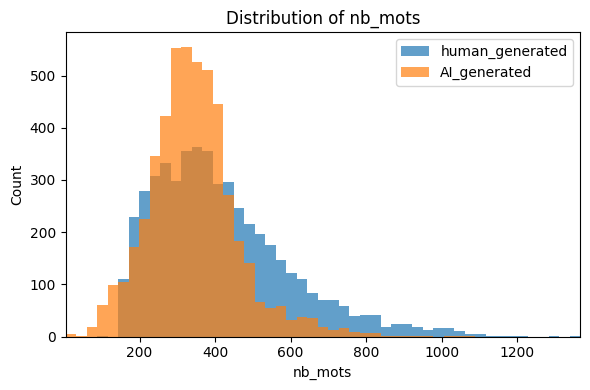

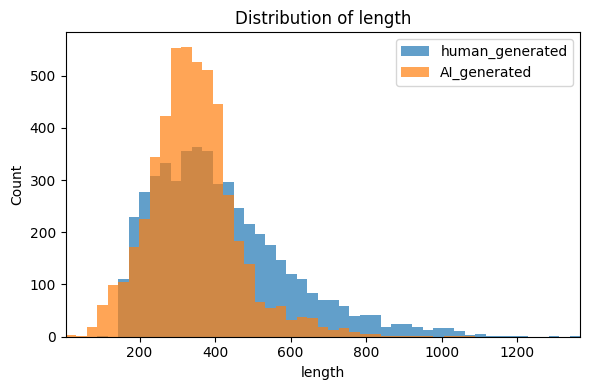

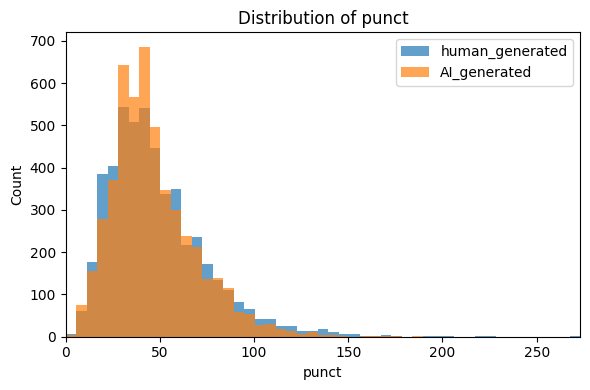

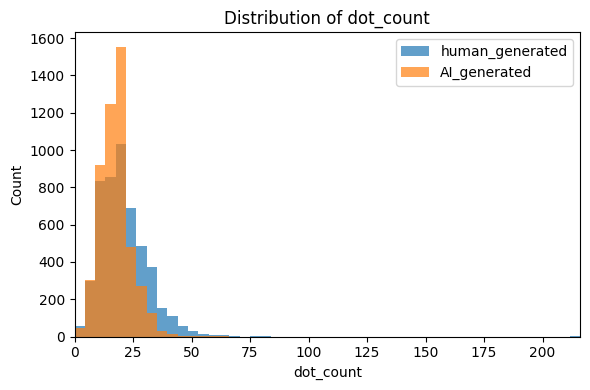

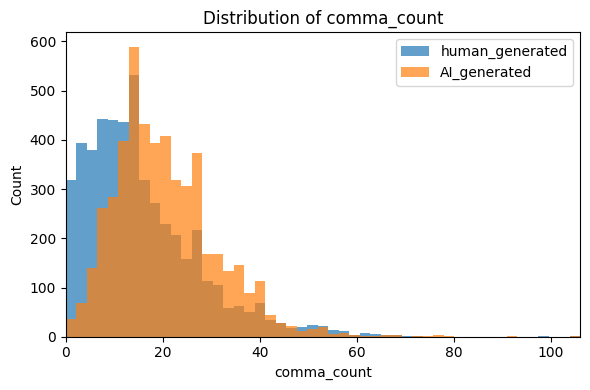

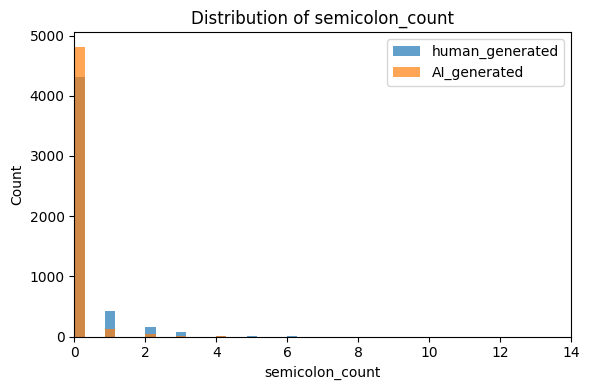

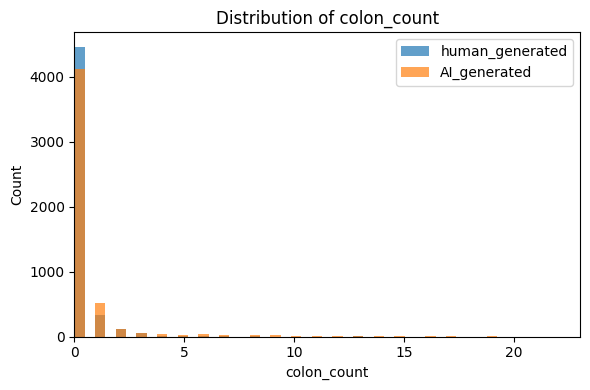

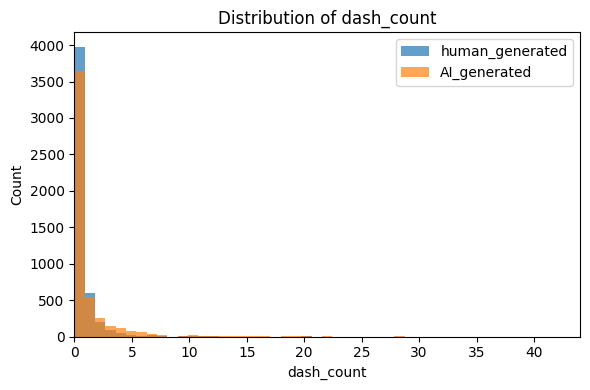

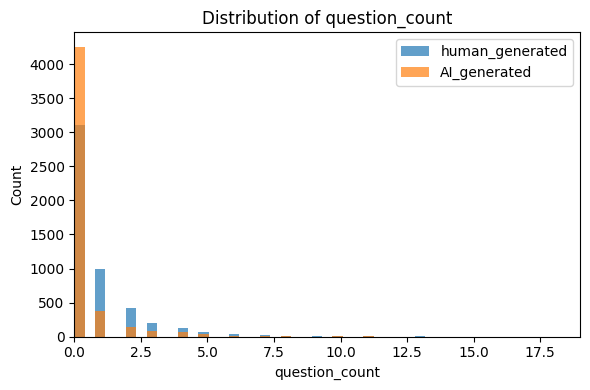

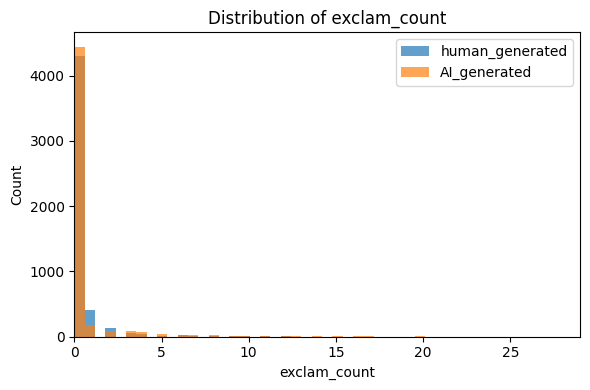

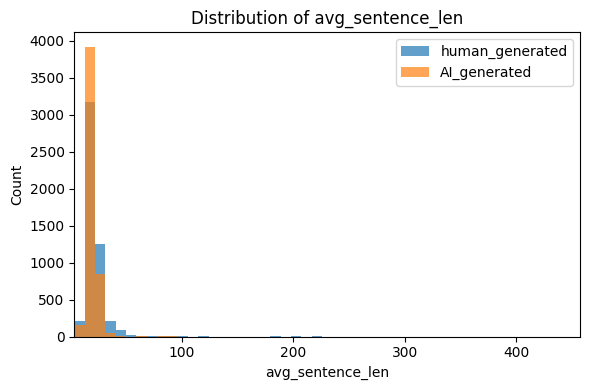

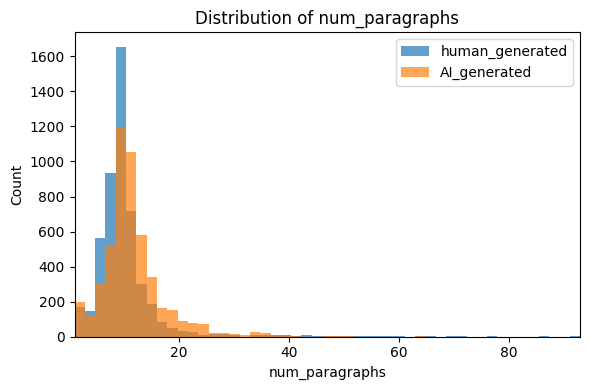

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Colonnes numériques sauf 'text' et 'generated'
cols_to_plot = [col for col in df.columns if col not in ['text', 'generated'] and df[col].dtype in ['int64', 'float64']]

# Tracer les histogrammes pour chaque colonne
for col in cols_to_plot:
    plt.figure(figsize=(6, 4))

    # Récupérer les données de la colonne pour human et AI généré
    data_human = df[df['generated'] == 0][col]
    data_ai = df[df['generated'] == 1][col]

    # Trouver les min et max pour chaque colonne
    min_value = min(data_human.min(), data_ai.min())
    max_value = max(data_human.max(), data_ai.max())

    # Créer les bins en fonction de la plage dynamique des données
    bins = np.linspace(min_value, max_value, num=50)

    # Tracer les histogrammes
    plt.hist(data_human, bins=bins, alpha=0.7, label='human_generated')
    plt.hist(data_ai, bins=bins, alpha=0.7, label='AI_generated')

    # Ajuster les limites de l'axe X en fonction des valeurs min et max
    plt.xlim([min_value, max_value])  # Adapter l'axe X à la plage des données

    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### Segmentation en paragraphes

In [ ]:
# Simple segmentation par les sauts de ligne
df['paragraphs'] = df['text'].apply(lambda x: x.split('\n'))

# Compter le nombre de paragraphes
df['num_paragraphs'] = df['paragraphs'].apply(len)

df.groupby('generated')['num_paragraphs'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,9.6778,6.446821,1.0,7.0,9.0,11.0,93.0
1,5000.0,11.3242,5.880273,1.0,9.0,11.0,13.0,63.0


Les textes générés par l'IA ont en moyenne plus de paragraphes que ceux écrits par des humains (11.47 vs 9.68). Cela suggère que l'IA a tendance à segmenter davantage le contenu, possiblement pour améliorer la lisibilité ou respecter une structure logique attendue. Les humains, quant à eux, utilisent des structures légèrement plus compactes, avec parfois de longues sections non divisées. Ce comportement de l’IA peut refléter une optimisation pour la clarté ou un respect de formats standards appris lors de l'entraînement.

### Grammaire

In [ ]:
! pip install pyspellchecker

   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.1 MB 1.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/7.1 MB 4.5 MB/s eta 0:00:02
   ---------- ----------------------------- 1.9/7.1 MB 13.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.1/7.1 MB 21.9 MB/s eta 0:00:01
   ----------------------------------- ---- 6.4/7.1 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------- 7.1/7.1 MB 25.3 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

def count_spelling_errors(text):
    words = text.split()
    misspelled = spell.unknown(words)
    return len(misspelled)

df['spelling_errors'] = df['text'].apply(count_spelling_errors)
df.groupby('generated')['spelling_errors'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,37.5840,18.903090,1.0,24.0,34.0,48.0,156.0
1,5000.0,36.7404,15.364134,0.0,27.0,34.0,45.0,133.0


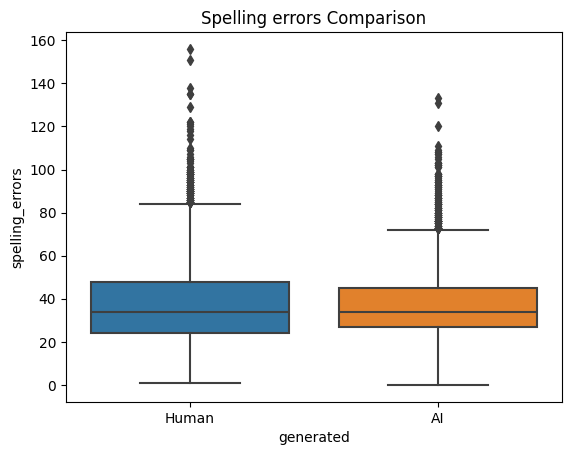

In [ ]:
sns.boxplot(x='generated', y='spelling_errors', data=df)
plt.xticks([0,1], ['Human', 'AI'])
plt.title("Spelling errors Comparison")
plt.show()

Les deux types de textes présentent un nombre similaire de fautes selon l’outil avec en moyenne quand même légèrement moins de fautes pour l'IA et une légère tendance à plus de variabilité chez les humains (écart-type et max plus élevés).

Cela suggère que :
- Les textes humains contiennent plus d’écarts orthographiques extrêmes (quelques individus à 156 fautes !).
- Les textes IA sont plus homogènes en termes de forme, probablement parce qu’ils suivent plus systématiquement des règles apprises.

spell.unknown : Il utilise un algorithme de distance de Levenshtein pour trouver les permutations situées à une distance d'édition de 2 par rapport au mot original. Il compare ensuite toutes les permutations (insertions, suppressions, remplacements et transpositions) à des mots connus figurant dans une liste de fréquences. Les mots qui figurent le plus souvent dans la liste de fréquences sont plus susceptibles de donner des résultats corrects.

### Indice de lisibilité

In [ ]:
! pip install textstat

   ---------------------------------------- 0.0/175.3 kB ? eta -:--:--
   --------- ------------------------------ 41.0/175.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 175.3/175.3 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   ----------------------- --------------- 563.2/939.4 kB 17.3 MB/s eta 0:00:01
   --------------------------------------- 939.4/939.4 kB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------  2.1/2.1 MB 66.7 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 44.0 MB/s eta 0:00:00


In [ ]:
import textstat

# Calcul de l'indice Flesch-Kincaid
df['flesch_kincaid'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(x))

df.groupby('generated')['flesch_kincaid'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,63.017572,16.204908,-357.170109,56.474462,64.290913,71.872778,93.514328
1,5000.0,47.018638,16.681473,-23.360000,35.781300,46.060672,57.570926,96.623335


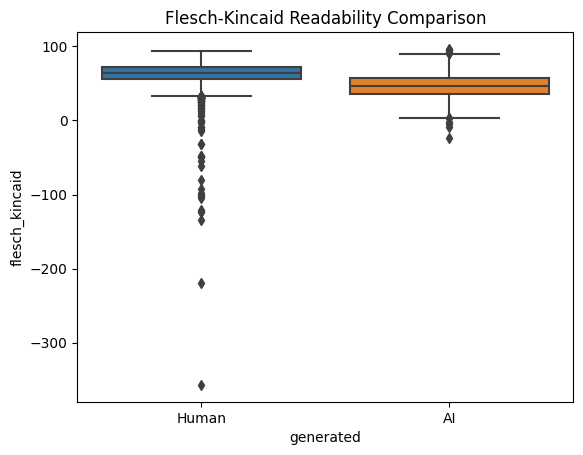

In [ ]:
sns.boxplot(x='generated', y='flesch_kincaid', data=df)
plt.xticks([0,1], ['Human', 'AI'])
plt.title("Flesch-Kincaid Readability Comparison")
plt.show()

In [ ]:
# Textes avec un score suspect < 0
df[df['flesch_kincaid'] < 0]['text'].head()

469     I think that it should be a grade c average ca...
766     Any students when they get to high school migh...
768     Yes impression can be change based on your exp...
896     There once was three citizen friends from Bost...
1254    I think that it should by a grade c average ca...
Name: text, dtype: object

In [ ]:
# exemple de texte avec un score < 0
print(df.iloc[469]['text'])

I think that it should be a grade c average cause half of the kids can't do will in their classes and some kids won't be able to do the shorts or other activities cause some of them can't keep there grades uh cause the stuff they do in their class are hard for them some kids can keep there grades uh to a c, and it will kinda be hard for some kids to keep it uh above B and there probably won't be a lot of kids in shorts because they can't keep there grades at a B and some other activities probably won't a lot of people to cause they can't keep there grades uh and I think it should be a c average cause keeping your grades uh to a b will probably be hard for some kids and if there is smart people who don't like shorts won't even sign uh for it and if the smart people don't like the other activities there won't be anybody in the activities or in the shorts and I think it should stay to a grade C average because it will be hard keeping your grades uh to a grade B, so it should be a grade B 

Le Flesch Reading Ease score mesure la facilité de lecture d’un texte. Il varie entre 0 (très difficile) et 100 (facile) Il est basé sur :
- le nombre de mots par phrase,
- le nombre de syllabes par mot.

Lors de l’analyse des indices de lisibilité, notamment le score Flesch Reading Ease, il apparaît que les textes humains sont, en moyenne, plus faciles à lire que ceux générés par intelligence artificielle. Ce score, qui évalue la lisibilité sur la base de la longueur des phrases et des mots, est plus élevé en moyenne pour les textes humains, suggérant une syntaxe plus simple et un vocabulaire plus accessible. Cela peut s’expliquer par le fait que les humains tendent à utiliser des formulations plus directes et naturelles, en particulier dans des contextes informels. Toutefois, les textes humains présentent également une plus grande dispersion, avec des scores parfois très faibles voire négatifs, ce qui reflète une variabilité importante dans la qualité rédactionnelle. Loin d’être de simples erreurs, ces textes peuvent refléter une pensée spontanée, moins structurée, typique de certaines productions humaines, notamment en situation d’expression libre, d’émotion forte ou de moindre maîtrise linguistique. À l'inverse, les textes générés par IA présentent moins de scores aberrants, traduisant une production plus standardisée, cohérente et grammaticalement structurée. Cette différence met en lumière deux modes d'expression distincts : la régularité formelle des IA face à la diversité des productions humaines, qui oscillent entre clarté, spontanéité et désorganisation.

### Analyse de la profondeur

In [ ]:
def get_max_dependency_depth(text):
    doc = nlp(text)
    def get_depth(token):
        depth = 0
        while token.head != token:  # Remonter jusqu'à la racine
            token = token.head
            depth += 1
        return depth
    return max(get_depth(token) for token in doc)

df['syntax_depth'] = df['text'].apply(get_max_dependency_depth)
df.groupby('generated')['syntax_depth'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,9.7440,2.230305,5.0,8.0,9.0,11.0,23.0
1,5000.0,9.6344,2.102480,3.0,8.0,9.0,11.0,22.0


Les valeurs moyennes sont quasi identiques (9.66 vs 9.61), donc en moyenne, les phrases IA et humaines ont une complexité similaire.
L’écart-type est un peu plus élevé pour les textes humains, ce qui peut indiquer une plus grande variabilité syntaxique.

### Part of speech (POS)

In [ ]:
# Charger le modèle spaCy pour l'anglais
nlp = spacy.load('en_core_web_sm')

def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    return pos_tags

# Appliquer la fonction à ta colonne de texte
df['pos_tags'] = df['text'].apply(pos_tagging)

# Compter la fréquence des tags POS
from collections import Counter
df['pos_tag_count'] = df['pos_tags'].apply(lambda tags: Counter(tags))

# Comptage des noms
df['noun_count'] = df['pos_tags'].apply(lambda tags: tags.count('NOUN'))

# Comptage des verbes
df['verb_count'] = df['pos_tags'].apply(lambda tags: tags.count('VERB'))

# Comptage des adjectifs
df['adj_count'] = df['pos_tags'].apply(lambda tags: tags.count('ADJ'))

# Comptage des adverbes
df['adv_count'] = df['pos_tags'].apply(lambda tags: tags.count('ADV'))

In [ ]:
df.groupby('generated')['noun_count'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,86.7456,43.466515,14.0,55.0,78.0,108.0,294.0
1,5000.0,84.3490,37.891914,1.0,56.0,80.0,106.0,372.0


In [ ]:
df.groupby('generated')['verb_count'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,60.6766,28.142424,8.0,40.0,55.0,75.0,210.0
1,5000.0,47.5382,16.790668,0.0,36.0,47.0,57.0,142.0


In [ ]:
df.groupby('generated')['adj_count'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,29.3982,16.312770,1.0,17.0,26.0,38.0,119.0
1,5000.0,32.7326,15.361038,0.0,23.0,30.0,40.0,182.0


In [ ]:
df.groupby('generated')['adv_count'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,20.9078,11.700610,0.0,13.0,19.0,27.0,86.0
1,5000.0,15.5080,7.190402,0.0,10.0,15.0,20.0,50.0


Ces résultats permettent plusieurs constatations :
- Les deux types de textes utilisent une quantité similaire de noms. Cela suggère que les modèles génératifs imitent assez bien la structure nominale du discours humain.
- Les textes humains semblent plus dynamiques (plus de verbes). Cela peut refléter un style plus actionnel ou narratif dans les textes humains, tandis que les textes IA peuvent avoir tendance à rester plus déclaratifs ou descriptifs.
- Les texte humains semblent également plus subtils (plus d’adverbes). Cela suggère que les textes humains sont souvent plus nuancés ou subjectifs, alors que les textes IA peuvent paraître plus plats ou factuels.
- Les textes IA peuvent être légèrement plus descriptifs (plus d’adjectifs) mais moins nuancés. L'utilisation de plus d’adjectifs peut être lié à une tendance à "enjoliver" ou à surqualifier les éléments (effet typique de modèles génératifs entraînés à produire des textes fluides et riches).

### Cohérence

In [ ]:
nlp = spacy.load("en_core_web_md") # on utilise ce modèle Spacy car il contient des vecteurs, essentiels pour calculer le score de cohérence

# Fonction de score de cohérence (mots consécutifs)
def coherence_score(text):
    doc = nlp(text)
    similarity_scores = [
        doc[i].similarity(doc[i + 1])
        for i in range(len(doc) - 1)
        if doc[i].has_vector and doc[i + 1].has_vector  # on évite les tokens sans vecteurs
    ]
    return sum(similarity_scores) / len(similarity_scores) if similarity_scores else 0

df['coherence_score'] = df['text'].apply(coherence_score)
df.groupby('generated')['coherence_score'].describe()

,count,mean,std,min,25%,50%,75%,max
generated,,,,,,,,
0,5000.0,0.378807,0.044378,0.204238,0.349176,0.379129,0.408867,0.544791
1,5000.0,0.362109,0.049490,0.134622,0.327237,0.356874,0.390725,0.572465


Selon ces résultats, les textes humains ont une cohérence lexicale locale légèrement supérieure en moyenne. Cela peut refléter une continuité plus naturelle dans le choix des mots consécutifs. Toutefois, l’écart n’est pas énorme, ce qui souligne que les modèles d’IA parviennent aussi à générer des enchaînements de mots localement cohérents.

## Régressions: Les différences sont-elles significatives entre les groupes?

In [ ]:
df.columns

Index(['text', 'generated', 'nb_mots', 'length', 'punct', 'dot_count',
       'comma_count', 'semicolon_count', 'colon_count', 'dash_count',
       'question_count', 'exclam_count', 'avg_sentence_len', 'paragraphs',
       'num_paragraphs', 'spelling_errors', 'flesch_kincaid', 'syntax_depth',
       'pos_tags', 'pos_tag_count', 'noun_count', 'verb_count', 'adj_count',
       'adv_count'],
      dtype='object')

In [ ]:
#On importe la librairie
import statsmodels.api as sm

In [ ]:
#On sélectionne les variables dépendantes

variables_dependantes = [
    'nb_mots', 'length', 'punct', 'dot_count', 'comma_count', 'semicolon_count',
    'colon_count', 'dash_count', 'question_count', 'exclam_count', 'avg_sentence_len',
    'num_paragraphs', 'spelling_errors', 'flesch_kincaid',
    'syntax_depth', 'noun_count', 'verb_count', 'adj_count', 'adv_count'
]

#On définit la variable indépendante: generated

X = df['generated']

In [ ]:
#On crée une boucle pour itérer sur toutes les variables dépendantes

for var in variables_dependantes:
    if var not in df.columns:
        print(f"⚠️  Variable '{var}' non trouvée.")
        continue

    y = df[var]
    modelo = sm.OLS(y, X).fit()

    print(f"📊 Regression: {var} ~ generated")
    print(f"  Coef. group: {modelo.params['generated']:.4f}")
    print(f"  Valeur p:    {modelo.pvalues['generated']:.4f}")
    print(f"  t de Student: {modelo.tvalues['generated']:.4f}")
    print(f"  R²:         {modelo.rsquared:.4f}")
    print("-" * 40)

📊 Regression: nb_mots ~ generated
  Coef. group: 342.5336
  Valeur p:    0.0000
  t de Student: 72.7154
  R²:         0.3459
----------------------------------------
📊 Regression: length ~ generated
  Coef. group: 342.5336
  Valeur p:    0.0000
  t de Student: 72.7154
  R²:         0.3459
----------------------------------------
📊 Regression: punct ~ generated
  Coef. group: 46.3464
  Valeur p:    0.0000
  t de Student: 77.7507
  R²:         0.3768
----------------------------------------
📊 Regression: dot_count ~ generated
  Coef. group: 17.6670
  Valeur p:    0.0000
  t de Student: 73.0748
  R²:         0.3481
----------------------------------------
📊 Regression: comma_count ~ generated
  Coef. group: 20.5114
  Valeur p:    0.0000
  t de Student: 91.7049
  R²:         0.4568
----------------------------------------
📊 Regression: semicolon_count ~ generated
  Coef. group: 0.0554
  Valeur p:    0.0000
  t de Student: 6.4894
  R²:         0.0042
----------------------------------------

In [ ]:
##Régression logistique (car generated est binaire) avec toutes les variables explicatives
#variables_dependentes = [
    #'nb_mots', 'length', 'punct', 'dot_count', 'comma_count', 'semicolon_count',
    #'colon_count', 'dash_count', 'question_count', 'exclam_count', 'avg_sentence_len',
    #'num_paragraphs', 'spelling_errors', 'flesch_kincaid',
    #'syntax_depth', 'noun_count', 'verb_count', 'adj_count', 'adv_count'
#]

#X = df[variables_dependentes]

#y = df['generated']

#model_logit = sm.Logit(y, X).fit()
#print(model_logit.summary())

Lorsqu'on exécute ce code, cela donne une erreur, et cela est dû au fait que la matrice est singulière. On observe dans le code suivant que cela est dû à un problème de multicolinéarité (rang inférieur aux colonnes).

In [ ]:
import numpy as np

X = df[variables_dependantes]
X = sm.add_constant(X)

# On revoit le rang de la matrice
print("Rang:", np.linalg.matrix_rank(X))
print("Colonness:", X.shape[1])

Rang: 19
Colonness: 20


In [ ]:
#Ce code permet d'automatiquement supprimer les variables qui donnent des problèmes de multicolinéarité et de faire une régression conséquente.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def eliminer_colinearité(X, umbral_vif=10.0):
    X = X.copy()
    while True:
        vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        max_vif = max(vif)
        if max_vif > umbral_vif:
            idx = vif.index(max_vif)
            print(f"Supprimant '{X.columns[idx]}' (VIF={max_vif:.2f})")
            X = X.drop(columns=[X.columns[idx]])
        else:
            break
    return X

X = df[variables_dependantes]
X = sm.add_constant(X)
X = eliminer_colinearité(X)

y = df['generated']
model_logit = sm.Logit(y, X).fit()
print(model_logit.summary())

C:\Users\yavav\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Supprimant 'nb_mots' (VIF=inf)
Supprimant 'const' (VIF=85.45)
Supprimant 'length' (VIF=145.48)
Supprimant 'punct' (VIF=61.30)
Supprimant 'spelling_errors' (VIF=33.87)
Supprimant 'noun_count' (VIF=29.24)
Supprimant 'verb_count' (VIF=19.39)
Supprimant 'syntax_depth' (VIF=18.05)
Supprimant 'dot_count' (VIF=15.29)
Supprimant 'adj_count' (VIF=10.07)
Optimization terminated successfully.
         Current function value: 0.518349
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              generated   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Tue, 13 May 2025   Pseudo R-squ.:                  0.2522
Time:                        19:56:28   Log-Likelihood:                -5183.5
converged:                       True   LL-Null:                       -6931.

On observe que toutes les variables impactent de manière significative le fait que ça soit produit par un humain ou par l'intelligence artificielle, hormis la longueur moyenne des phrases.

## Traitement et nettoyage de données

In [ ]:
def clean_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc
              if token.is_alpha and not token.is_stop and len(token) > 3]
    return " ".join(tokens)

In [ ]:
df["texte_propre"] = df["text"].astype(str).apply(clean_text)

In [ ]:
df[["text", "texte_propre"]].head()

,text,texte_propre
0,Do curfews keep teenagers from Getting into tr...,curfew teenager get trouble city council curre...
1,"In this article ""The Challenge of Exploring Ve...",article challenge explore venus author suggest...
2,With THP rapid growth of THP Internet in recen...,rapid growth internet recent decade question s...
3,The electoral College is the way Us United Sta...,electoral college united states citizen vote f...
4,This technology of you can calculate the emoti...,technology calculate emotion people pretty sca...


In [ ]:
df['generated'] = df['generated'].replace({0: 'humain', 1: 'IA'})

## Deuxième analyse textuelle

### Nuage de mots

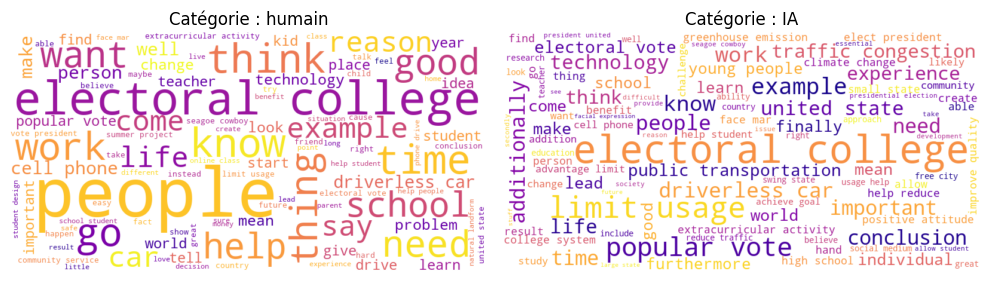

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# On récupère les catégories uniques
catégories = df["generated"].unique()

# Créer une figure avec 1 ligne et autant de colonnes que de catégories
fig, axes = plt.subplots(1, len(catégories), figsize=(10, 5))

# Si len(catégories) == 1, axes n'est pas une liste → le for planterait
if len(catégories) == 1:
    axes = [axes]

# Boucle sur chaque catégorie et axe
for i, catégorie in enumerate(catégories):
    # Concatène tous les textes de la catégorie
    text_catégorie = " ".join(df[df["generated"] == catégorie]["texte_propre"].dropna())

    # Génération du nuage de mots
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='plasma',
        max_words=100
    ).generate(text_catégorie)

    # Affichage sur le subplot correspondant
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Catégorie : {catégorie}", fontsize=12)

plt.tight_layout()
plt.show()

### Mots les plus fréquents

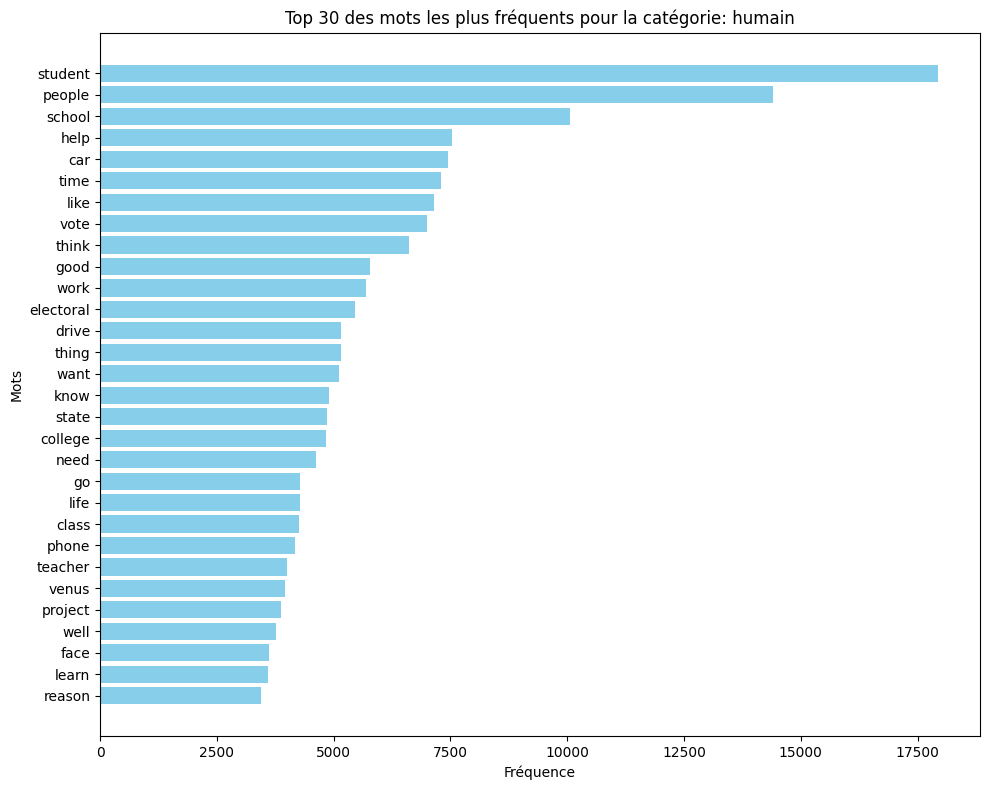

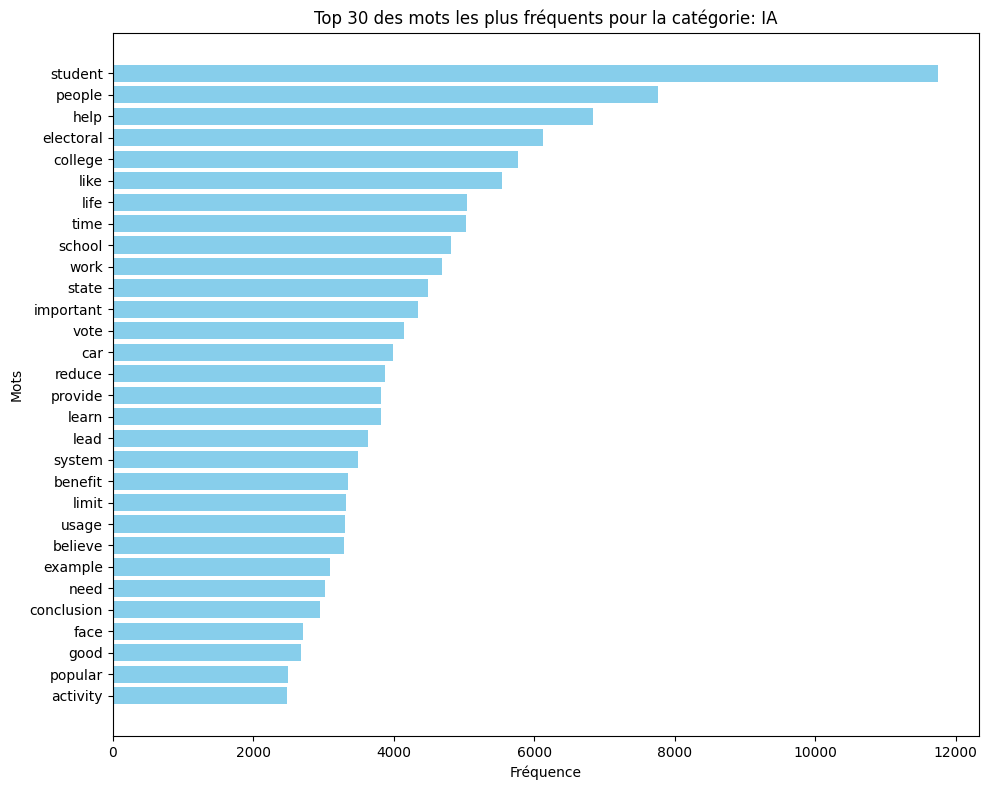

In [ ]:
from collections import Counter

# Fonction pour extraire les mots les plus fréquents
def get_top_words(df, catégorie):
    all_text = " ".join(df["texte_propre"].dropna())
    words = all_text.split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(30) #avoir 30 mots

    words_plot, counts = zip(*common_words)

    plt.figure(figsize=(10, 8))
    plt.barh(words_plot, counts, color='skyblue')
    plt.title(f'Top 30 des mots les plus fréquents pour la catégorie: {catégorie}')
    plt.xlabel('Fréquence')
    plt.ylabel('Mots')
    plt.gca().invert_yaxis()  # Inverser l’ordre pour que les mots les plus fréquents soient en haut
    plt.tight_layout()
    plt.show()

# Filtrer les données pour chaque sentiment
df_humain = df[df["generated"] == "humain"]
df_IA = df[df["generated"] == "IA"]

# Affichage
get_top_words(df_humain, "humain")
get_top_words(df_IA, "IA")

### La LDA

In [ ]:
#We need first to perform some text pre-processing before running LDA using Count vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = cv.fit_transform(df['texte_propre'])

LDA = LatentDirichletAllocation(n_components=3,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

In [ ]:
#Grab the vocabulary of words
len(cv.get_feature_names_out())

12147

In [ ]:
#Let's set up a loop to print the top 15 words for each of the topics
for i,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{i}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['technology', 'know', 'good', 'think', 'teacher', 'project', 'work', 'venus', 'learn', 'face', 'life', 'like', 'help', 'people', 'student']


THE TOP 15 WORDS FOR TOPIC #1
['work', 'popular', 'election', 'candidate', 'activity', 'president', 'people', 'class', 'time', 'state', 'college', 'vote', 'electoral', 'school', 'student']


THE TOP 15 WORDS FOR TOPIC #2
['road', 'phone', 'world', 'driver', 'pollution', 'transportation', 'city', 'driverless', 'help', 'limit', 'reduce', 'usage', 'drive', 'people', 'car']




Topic #0 — Apprentissage, technologie, éducation
Ce topic semble tourner autour de l'éducation et l'apprentissage, avec une forte présence de mots liés à l'école, l'enseignement, et la technologie. On y retrouve aussi des termes plus généraux comme life, help, people, ce qui suggère une thématique assez large sur l’apprentissage personnel ou scolaire, possiblement dans un cadre numérique ou scientifique (présence surprenante de venus).

Topic #1 — Politique et système électoral
Ce topic est clairement orienté politique, avec des mots comme election, candidate, vote, president, electoral.

Topic #2 — Transport et environnement
Ce troisième topic renvoie au transport, notamment aux problématiques modernes : pollution, driverless (autonome), usage, reduce. L’aspect écologique ressort clairement, suggérant que ce topic traite des enjeux liés à la mobilité urbaine, aux voitures autonomes, et à la durabilité.



In [ ]:
#The last thing is to attach the discovered Topic Labels to Original Articles
#We'll create a new column in the file that contains the topic number
topic_results = LDA.transform(dtm)
topic_results.shape

(10000, 3)

In [ ]:
#To see the probability of the first article to belong to a topic
topic_results[0].round(2)

array([0.  , 0.66, 0.34])

In [ ]:
#We are interested in the index position of the highest probabiliy in each topics
topic_results[0].argmax()

np.int64(1)

In [ ]:
df['Topic'] = topic_results.argmax(axis=1)

In [ ]:
df = df.rename(columns={'generated': 'genere_par_IA'})
df

,text,genere_par_IA,nb_mots,length,punct,dot_count,comma_count,semicolon_count,colon_count,dash_count,...,syntax_depth,pos_tags,pos_tag_count,noun_count,verb_count,adj_count,adv_count,coherence_score,texte_propre,Topic
0,Do curfews keep teenagers from Getting into tr...,humain,749,749,94,43,17,5,0,0,...,8,"[AUX, NOUN, VERB, NOUN, ADP, VERB, ADP, NOUN, ...","{'AUX': 92, 'NOUN': 139, 'VERB': 109, 'ADP': 9...",139,109,38,39,0.430629,curfew teenager get trouble city council curre...,1
1,"In this article ""The Challenge of Exploring Ve...",humain,451,451,58,21,28,0,0,0,...,8,"[ADP, DET, NOUN, PUNCT, DET, PROPN, ADP, PROPN...","{'ADP': 62, 'DET': 43, 'NOUN': 95, 'PUNCT': 55...",95,51,49,31,0.344840,article challenge explore venus author suggest...,0
2,With THP rapid growth of THP Internet in recen...,humain,684,684,71,32,36,0,0,1,...,10,"[ADP, PROPN, ADJ, NOUN, ADP, PROPN, PROPN, ADP...","{'ADP': 92, 'PROPN': 67, 'ADJ': 67, 'NOUN': 15...",154,79,67,49,0.306867,rapid growth internet recent decade question s...,1
3,The electoral College is the way Us United Sta...,humain,689,689,87,37,10,0,1,0,...,10,"[DET, PROPN, PROPN, AUX, DET, NOUN, PROPN, PRO...","{'DET': 80, 'PROPN': 59, 'AUX': 48, 'NOUN': 10...",102,95,39,31,0.368333,electoral college united states citizen vote f...,1
4,This technology of you can calculate the emoti...,humain,344,344,42,23,13,0,0,0,...,6,"[DET, NOUN, ADP, PRON, AUX, VERB, DET, NOUN, A...","{'DET': 27, 'NOUN': 62, 'ADP': 29, 'PRON': 48,...",62,53,16,18,0.395040,technology calculate emotion people pretty sca...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The due of electronic dictionaries (Dictionari...,IA,263,263,39,16,19,0,0,1,...,7,"[DET, NOUN, ADP, ADJ, NOUN, PUNCT, PROPN, PUNC...","{'DET': 16, 'NOUN': 61, 'ADP': 35, 'ADJ': 28, ...",61,30,28,22,0.340673,electronic dictionary dictionary increasingly ...,0
9996,"Yo, so like, drivers and they cell Phones, man...",IA,329,329,166,18,104,0,0,2,...,6,"[PROPN, PUNCT, ADV, INTJ, PUNCT, NOUN, CCONJ, ...","{'PROPN': 12, 'PUNCT': 141, 'ADV': 22, 'INTJ':...",59,36,24,22,0.485587,like driver cell phone like able drivin think ...,2
9997,"Driverless cars, also commonly known as self-d...",IA,533,533,61,22,35,0,0,1,...,16,"[ADJ, NOUN, PUNCT, ADV, ADV, VERB, ADP, NOUN, ...","{'ADJ': 70, 'NOUN': 138, 'PUNCT': 59, 'ADV': 2...",138,66,70,26,0.347084,driverless car commonly know self drive car au...,2
9998,"HEC there, I know COU think the Face on Mars i...",IA,300,300,85,21,36,0,0,0,...,8,"[PROPN, ADV, PUNCT, PRON, VERB, PROPN, VERB, D...","{'PROPN': 27, 'ADV': 31, 'PUNCT': 64, 'PRON': ...",49,36,19,31,0.429475,know think face mar like totally create alien ...,0


In [ ]:
# Table de contingence : occurrences de chaque catégorie par topic
topic_catégorie_counts = pd.crosstab(df['Topic'], df['genere_par_IA'])

print(topic_catégorie_counts)

genere_par_IA    IA  humain
Topic                      
0              2767    1793
1              1116    1750
2              1117    1457


In [ ]:
cat_topic_percent = pd.crosstab(df['Topic'], df['genere_par_IA'], normalize='index') * 100
print(cat_topic_percent.round(2))

genere_par_IA     IA  humain
Topic                       
0              60.68   39.32
1              38.94   61.06
2              43.40   56.60


- Topic 0 est majoritairement généré par l'IA (60.68% contre 39.32% pour l'humain). L’IA domine sur les sujets "consensuels" et neutres (éducation).
- Topic 1 est presque à l'opposé, avec une majorité de textes humains (61.06%) par rapport aux textes générés par l'IA (38.94%). Ce topic est majoritairement traité par des humains, ce qui est logique, car la politique implique des opinions, des jugements de valeur, voire de la controverse, ce que les IA évitent ou modèrent généralement.
- Topic 2 présente une répartition plus équilibrée, avec une légère majorité de textes humains (56.60%) par rapport aux textes générés par l'IA (43.40%).

### Analyse de sentiments

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['scores'] = df['texte_propre'].apply(lambda texte_propre: sid.polarity_scores(texte_propre))
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emmal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,genere_par_IA,nb_mots,length,punct,dot_count,comma_count,semicolon_count,colon_count,dash_count,...,pos_tags,pos_tag_count,noun_count,verb_count,adj_count,adv_count,coherence_score,texte_propre,Topic,scores
0,Do curfews keep teenagers from Getting into tr...,humain,749,749,94,43,17,5,0,0,...,"[AUX, NOUN, VERB, NOUN, ADP, VERB, ADP, NOUN, ...","{'AUX': 92, 'NOUN': 139, 'VERB': 109, 'ADP': 9...",139,109,38,39,0.430629,curfew teenager get trouble city council curre...,1,"{'neg': 0.175, 'neu': 0.535, 'pos': 0.29, 'com..."
1,"In this article ""The Challenge of Exploring Ve...",humain,451,451,58,21,28,0,0,0,...,"[ADP, DET, NOUN, PUNCT, DET, PROPN, ADP, PROPN...","{'ADP': 62, 'DET': 43, 'NOUN': 95, 'PUNCT': 55...",95,51,49,31,0.344840,article challenge explore venus author suggest...,0,"{'neg': 0.069, 'neu': 0.741, 'pos': 0.19, 'com..."
2,With THP rapid growth of THP Internet in recen...,humain,684,684,71,32,36,0,0,1,...,"[ADP, PROPN, ADJ, NOUN, ADP, PROPN, PROPN, ADP...","{'ADP': 92, 'PROPN': 67, 'ADJ': 67, 'NOUN': 15...",154,79,67,49,0.306867,rapid growth internet recent decade question s...,1,"{'neg': 0.083, 'neu': 0.722, 'pos': 0.195, 'co..."
3,The electoral College is the way Us United Sta...,humain,689,689,87,37,10,0,1,0,...,"[DET, PROPN, PROPN, AUX, DET, NOUN, PROPN, PRO...","{'DET': 80, 'PROPN': 59, 'AUX': 48, 'NOUN': 10...",102,95,39,31,0.368333,electoral college united states citizen vote f...,1,"{'neg': 0.069, 'neu': 0.673, 'pos': 0.258, 'co..."
4,This technology of you can calculate the emoti...,humain,344,344,42,23,13,0,0,0,...,"[DET, NOUN, ADP, PRON, AUX, VERB, DET, NOUN, A...","{'DET': 27, 'NOUN': 62, 'ADP': 29, 'PRON': 48,...",62,53,16,18,0.395040,technology calculate emotion people pretty sca...,0,"{'neg': 0.14, 'neu': 0.602, 'pos': 0.258, 'com..."


In [ ]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])
df.head()

,text,genere_par_IA,nb_mots,length,punct,dot_count,comma_count,semicolon_count,colon_count,dash_count,...,pos_tag_count,noun_count,verb_count,adj_count,adv_count,coherence_score,texte_propre,Topic,scores,compound
0,Do curfews keep teenagers from Getting into tr...,humain,749,749,94,43,17,5,0,0,...,"{'AUX': 92, 'NOUN': 139, 'VERB': 109, 'ADP': 9...",139,109,38,39,0.430629,curfew teenager get trouble city council curre...,1,"{'neg': 0.175, 'neu': 0.535, 'pos': 0.29, 'com...",0.9842
1,"In this article ""The Challenge of Exploring Ve...",humain,451,451,58,21,28,0,0,0,...,"{'ADP': 62, 'DET': 43, 'NOUN': 95, 'PUNCT': 55...",95,51,49,31,0.344840,article challenge explore venus author suggest...,0,"{'neg': 0.069, 'neu': 0.741, 'pos': 0.19, 'com...",0.9727
2,With THP rapid growth of THP Internet in recen...,humain,684,684,71,32,36,0,0,1,...,"{'ADP': 92, 'PROPN': 67, 'ADJ': 67, 'NOUN': 15...",154,79,67,49,0.306867,rapid growth internet recent decade question s...,1,"{'neg': 0.083, 'neu': 0.722, 'pos': 0.195, 'co...",0.9876
3,The electoral College is the way Us United Sta...,humain,689,689,87,37,10,0,1,0,...,"{'DET': 80, 'PROPN': 59, 'AUX': 48, 'NOUN': 10...",102,95,39,31,0.368333,electoral college united states citizen vote f...,1,"{'neg': 0.069, 'neu': 0.673, 'pos': 0.258, 'co...",0.9943
4,This technology of you can calculate the emoti...,humain,344,344,42,23,13,0,0,0,...,"{'DET': 27, 'NOUN': 62, 'ADP': 29, 'PRON': 48,...",62,53,16,18,0.395040,technology calculate emotion people pretty sca...,0,"{'neg': 0.14, 'neu': 0.602, 'pos': 0.258, 'com...",0.8979


In [ ]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'pos'
    elif score <= -0.05:
        return 'neg'
    else:
        return 'neu'

df['comp_score'] = df['compound'].apply(classify_sentiment)
df.head()

,text,genere_par_IA,nb_mots,length,punct,dot_count,comma_count,semicolon_count,colon_count,dash_count,...,noun_count,verb_count,adj_count,adv_count,coherence_score,texte_propre,Topic,scores,compound,comp_score
0,Do curfews keep teenagers from Getting into tr...,humain,749,749,94,43,17,5,0,0,...,139,109,38,39,0.430629,curfew teenager get trouble city council curre...,1,"{'neg': 0.175, 'neu': 0.535, 'pos': 0.29, 'com...",0.9842,pos
1,"In this article ""The Challenge of Exploring Ve...",humain,451,451,58,21,28,0,0,0,...,95,51,49,31,0.344840,article challenge explore venus author suggest...,0,"{'neg': 0.069, 'neu': 0.741, 'pos': 0.19, 'com...",0.9727,pos
2,With THP rapid growth of THP Internet in recen...,humain,684,684,71,32,36,0,0,1,...,154,79,67,49,0.306867,rapid growth internet recent decade question s...,1,"{'neg': 0.083, 'neu': 0.722, 'pos': 0.195, 'co...",0.9876,pos
3,The electoral College is the way Us United Sta...,humain,689,689,87,37,10,0,1,0,...,102,95,39,31,0.368333,electoral college united states citizen vote f...,1,"{'neg': 0.069, 'neu': 0.673, 'pos': 0.258, 'co...",0.9943,pos
4,This technology of you can calculate the emoti...,humain,344,344,42,23,13,0,0,0,...,62,53,16,18,0.395040,technology calculate emotion people pretty sca...,0,"{'neg': 0.14, 'neu': 0.602, 'pos': 0.258, 'com...",0.8979,pos


In [ ]:
df.groupby(['genere_par_IA', 'comp_score']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Répartition des sentiments (VADER) par type de génération')
plt.xlabel('Texte généré par (0 = humain, 1 = IA)')
plt.ylabel('Nombre de textes')
plt.show()

In [ ]:
df['comp_score'].value_counts()

comp_score
pos    9133
neg     829
neu      38
Name: count, dtype: int64

In [ ]:
# Exemples de textes classés +/-/neutre
for label in ['pos', 'neg', 'neu']:
    print(f"\nExemple de texte {label.upper()} :\n")
    print(df[df['comp_score'] == label]['text'].iloc[0])


Exemple de texte POS :

Do curfews keep teenagers from Getting into trouble? The city council is still currently debating on either adopting the curfew to be at 10 p. m. during the week days or at midnight on the weekends. If teenagers were to be out after the hours selected, it would be considered breaking the law. The laws are choose for many reasons, even if we don't tree with most of them; we have to obey the laws. I believe the city council should adopt the curfew for the minors. When it comes to under ate people in this world we have to be more concerned for their safety, it is best to have curfews. We should consider all the dangerous things Point on in this world.

Have you considered all the things that could happen when your child is out? There is many dangerous things Point on in this world. I'm not saying something will happen but honestly nowadays anything could happen. Without an adults care vision many things could occur. Many minors are band killed or harmed for reason

In [ ]:
# Comparaison topic sentiment
topic_score_counts = pd.crosstab(df['Topic'], df['comp_score'])
print(topic_score_counts)

comp_score  neg  neu   pos
Topic                     
0           206   13  4341
1           152   11  2703
2           471   14  2089


In [ ]:
topic_score_percent = pd.crosstab(df['Topic'], df['comp_score'], normalize='index') * 100
print(topic_score_percent.round(2))

comp_score    neg   neu    pos
Topic                         
0            4.52  0.29  95.20
1            5.30  0.38  94.31
2           18.30  0.54  81.16


- Le Topic 0 (éducation) et le Topic 1 (politique) présentent une très forte prédominance de sentiments positifs, avec respectivement 95.20% et 94.31% de textes à tonalité positive. Cela suggère que ces thèmes sont majoritairement abordés de manière valorisante ou neutre, en particulier pour l’éducation, souvent traitée sous l’angle de l’apprentissage, de la réussite ou de l’innovation. La politique, bien qu’étant un sujet potentiellement conflictuel, est ici décrite de manière étonnamment modérée, probablement sous une forme descriptive ou institutionnelle.
- Le Topic 2 (transport et environnement) se distingue nettement par une tonalité plus contrastée : si les textes restent majoritairement positifs (81.16%), la proportion de sentiments négatifs y est plus élevée (18.30%), ce qui en fait le topic le plus polarisé émotionnellement. Cette différence peut s’expliquer par la nature du sujet, qui englobe des problématiques critiques comme la pollution, les limitations de circulation ou les inquiétudes liées au changement climatique, souvent source de préoccupations.

In [ ]:
# Comparaison catégorie sentiments
cat_senti_counts = pd.crosstab(df['genere_par_IA'], df['comp_score'])
print(cat_senti_counts)

comp_score     neg  neu   pos
genere_par_IA                
IA             225   11  4764
humain         604   27  4369


In [ ]:
cat_score_percent = pd.crosstab(df['genere_par_IA'], df['comp_score'], normalize='index') * 100
print(cat_score_percent.round(2))

comp_score       neg   neu    pos
genere_par_IA                    
IA              4.50  0.22  95.28
humain         12.08  0.54  87.38


Les textes générés par l'IA ont une proportion plus faible de sentiments négatifs (4.50%) et plus élevée de sentiments positifs (95.28%) que les textes humains.

Les textes humains ont une proportion plus élevée de sentiments négatifs (12.08%) et une proportion légèrement plus faible de sentiments positifs (87.38%).

En gros, les textes IA sont globalement plus positifs et moins négatifs que les textes humains. Cela pourrait suggérer que les modèles génératifs  tendent à produire un langage plus optimiste ou moins polarisé par rapport aux écrits humains.

### Mots Rares et diversité

In [ ]:
# MOTS RARES
from sklearn.feature_extraction.text import TfidfVectorizer

# Calcul du TF-IDF pour extraire les mots rares
vectorizer = TfidfVectorizer(min_df=0.01)  # Seuil pour considérer un mot comme rare
tfidf_matrix = vectorizer.fit_transform(df['texte_propre'])

# Extraire les mots rares avec leur score TF-IDF
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Affichage des mots rares pour chaque texte
rare_words = {}
for i, text in enumerate(df['texte_propre']):
    rare_words[i] = [(feature_names[j], tfidf_scores[i, j]) for j in range(len(feature_names)) if tfidf_scores[i, j] > 0.1]

df['rare_words'] = df.index.map(rare_words)

# Vérifier et compter les mots rares uniquement si la valeur est une liste valide
df['num_rare_words'] = df['rare_words'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calcul de la moyenne des mots rares par groupe (humains vs IA)
mean_rare_words_by_group = df.groupby('genere_par_IA')['num_rare_words'].mean()
print(mean_rare_words_by_group)

genere_par_IA
IA        17.5520
humain    17.0046
Name: num_rare_words, dtype: float64


Les textes générés par l’IA contiennent en moyenne un peu plus de mots rares significatifs que les textes humains (17.55 contre 17.00).
La différence est modeste, mais elle suggère que les textes IA utilisent peut-être un vocabulaire légèrement plus "technique" ou "ciblé".

In [ ]:
# DIVERSITE
def diversity_score(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words) / len(words)

df['diversity_score'] = df['texte_propre'].apply(diversity_score)
df.groupby('genere_par_IA')['diversity_score'].describe()

,count,mean,std,min,25%,50%,75%,max
genere_par_IA,,,,,,,,
IA,5000.0,0.597985,0.111478,0.151220,0.519553,0.589094,0.669131,1.000000
humain,5000.0,0.568401,0.113277,0.184358,0.488200,0.572238,0.649485,0.892857


Les textes IA ont une diversité lexicale légèrement plus élevée (0.598 contre 0.568).
Cela peut vouloir dire que l’IA utilise un vocabulaire un peu plus varié que les humains.

La diversité lexicale, mesurée pour chaque texte individuellement, évalue le rapport entre les mots uniques et le nombre total de mots ; elle reflète le degré de répétition dans un texte. Les textes générés par IA présentent une diversité légèrement plus élevée, ce qui suggère une tendance à éviter les répétitions et à maintenir un vocabulaire plus varié dans un même texte. Cela peut indiquer une volonté d’éviter les répétitions, un comportement typique des modèles génératifs.

### Bigrammes et trigrammes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fonction pour obtenir les n-grams
def get_ngrams(text, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform([text])
    return vectorizer.get_feature_names_out()

# Calcul des bigrammes et trigrammes
df['bigrams'] = df['texte_propre'].apply(lambda x: get_ngrams(x, n=2))
df['trigrams'] = df['texte_propre'].apply(lambda x: get_ngrams(x, n=3))

In [ ]:
# Calcul de la diversité des bigrammes et trigrammes
df['bigram_diversity'] = df['bigrams'].apply(lambda x: len(set(x)))
df['trigram_diversity'] = df['trigrams'].apply(lambda x: len(set(x)))

# Comparer les diversités
df.groupby('genere_par_IA')['bigram_diversity'].describe()

,count,mean,std,min,25%,50%,75%,max
genere_par_IA,,,,,,,,
IA,5000.0,138.7654,60.793618,2.0,100.0,130.0,165.0,597.0
humain,5000.0,143.3916,67.967323,32.0,93.0,130.0,178.0,521.0


In [ ]:
df.groupby('genere_par_IA')['trigram_diversity'].describe()

,count,mean,std,min,25%,50%,75%,max
genere_par_IA,,,,,,,,
IA,5000.0,150.6688,65.982536,1.0,108.0,142.0,178.0,649.0
humain,5000.0,154.4770,74.219251,33.0,99.0,140.0,192.0,572.0


Les humains produisent des textes légèrement plus diversifiés en termes de combinaisons de mots.
Cela peut refléter une plus grande originalité ou moins de répétition dans leur manière d’écrire.
Mais la différence est modérée.

## Modélisation

In [ ]:
X = df['texte_propre']
y = df['genere_par_IA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Vectorisation

In [ ]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set

X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
y_train.head()

9069        IA
2603    humain
7738        IA
1579    humain
5058        IA
Name: genere_par_IA, dtype: object

In [ ]:
y_test = y_test.map({'humain': 0, 'IA': 1})

In [ ]:
y_train = y_train.map({'humain': 0, 'IA': 1})

### Définition des modèles

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#Regression logistique
log_reg = LogisticRegression(random_state=42, solver='lbfgs')
log_reg.fit(X_train_tfidf, y_train)

#Linear SVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)

#MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)

#SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train_tfidf,y_train)

SVC(gamma='auto')

### Prédictions

In [ ]:
# Prédictions
pred_log = log_reg.predict(X_test_tfidf)
pred_clf = clf.predict(X_test_tfidf)
pred_rf = rf.predict(X_test_tfidf)
pred_nb = nb_model.predict(X_test_tfidf)
pred_svc = svc_model.predict(X_test_tfidf)

### Evaluation des modèles

#### Evaluation de la Régression Logistique

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, pred_log))
print('Accuray train : ' + str(accuracy_score(y_train, log_reg.predict(X_train_tfidf))))
print('Accuray test : ' + str(accuracy_score(y_test, pred_log)))
print(confusion_matrix(y_test, pred_log))
print("F1 Score:", f1_score(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1537
           1       0.97      0.95      0.96      1463

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Accuray train : 0.9787142857142858
Accuray test : 0.9626666666666667
[[1493   44]
 [  68 1395]]
F1 Score: 0.9614059269469332


#### Evaluation de Linear SVC

In [ ]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
print("F1 Score:", f1_score(y_test, pred_clf))

#Pour évaluer le sur-apprentissage
print('Accuray train : ' + str(accuracy_score(y_train, clf.predict(X_train_tfidf))))
print('Accuray test : ' + str(accuracy_score(y_test, pred_clf)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1537
           1       0.98      0.97      0.98      1463

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[1511   26]
 [  45 1418]]
F1 Score: 0.9755761953904368
Accuray train : 0.9972857142857143
Accuray test : 0.9763333333333334


#### Evaluation du Random Forest

In [ ]:
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print("F1 Score:", f1_score(y_test, pred_rf))
print('Accuray train : ' + str(accuracy_score(y_train, rf.predict(X_train_tfidf))))
print('Accuray test : ' + str(accuracy_score(y_test, pred_rf)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1537
           1       0.98      0.94      0.96      1463

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

[[1506   31]
 [  82 1381]]
F1 Score: 0.9606956521739131
Accuray train : 1.0
Accuray test : 0.9623333333333334


#### Evaluation du Multinomial NB

In [ ]:
print(classification_report(y_test, pred_nb))
print(confusion_matrix(y_test, pred_nb))
print("F1 Score:", f1_score(y_test, pred_nb))

#Pour évaluer le sur-apprentissage
print('Accuray train : ' + str(accuracy_score(y_train, nb_model.predict(X_train_tfidf))))
print('Accuray test : ' + str(accuracy_score(y_test, pred_nb)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1537
           1       0.94      0.91      0.93      1463

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

[[1456   81]
 [ 129 1334]]
F1 Score: 0.9270326615705351
Accuray train : 0.949
Accuray test : 0.93


#### Evaluation du SVC

In [ ]:
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print("F1 Score:", f1_score(y_test, pred_svc))

#Pour évaluer le sur-apprentissage
print('Accuray train : ' + str(accuracy_score(y_train, svc_model.predict(X_train_tfidf))))
print('Accuray test : ' + str(accuracy_score(y_test, pred_svc)))

C:\Users\emmal\anaconda3\envs\projet_nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emmal\anaconda3\envs\projet_nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emmal\anaconda3\envs\projet_nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1537
           1       0.49      1.00      0.66      1463

    accuracy                           0.49      3000
   macro avg       0.24      0.50      0.33      3000
weighted avg       0.24      0.49      0.32      3000

[[   0 1537]
 [   0 1463]]
F1 Score: 0.6556128164911494
Accuray train : 0.5052857142857143
Accuray test : 0.4876666666666667


### Vérification prédictions

### Modèle SVC interprétation

In [ ]:
# Récupérer les mots (features) du vectorizer
feature_names = vectorizer.get_feature_names_out()

# Récupérer les coefficients du modèle (attention : SVC -> LinearSVC)
coef = clf.coef_.flatten()

# Trier les mots les plus associés à l'IA (classe 1) et à l'humain (classe 0)
top_IA = np.argsort(coef)[-20:][::-1]   # 20 mots les plus positifs (vers IA)
top_humain = np.argsort(coef)[:20]      # 20 mots les plus négatifs (vers humain)

print(" Mots les plus associés aux textes IA :")
for i in top_IA:
    print(f"{feature_names[i]} ({coef[i]:.4f})")

print("\n Mots les plus associés aux textes humains :")
for i in top_humain:
    print(f"{feature_names[i]} ({coef[i]:.4f})")

 Mots les plus associés aux textes IA :
important (2.9979)
conclusion (2.6993)
additionally (2.6986)
ensure (2.3478)
super (2.1778)
provide (2.0181)
potential (2.0022)
essay (1.9633)
app (1.8596)
plus (1.7577)
difference (1.7222)
engage (1.6664)
extend (1.6506)
climate (1.6441)
consider (1.5855)
unique (1.5135)
argue (1.5049)
achieve (1.4411)
cool (1.4287)
privacy (1.3977)

 Mots les plus associés aux textes humains :
probably (-2.0319)
percent (-1.9815)
go (-1.6849)
america (-1.5662)
elector (-1.5542)
drive (-1.4983)
prove (-1.4843)
student (-1.4768)
tell (-1.4726)
paragraph (-1.3753)
people (-1.3595)
pass (-1.3429)
smog (-1.2898)
vote (-1.2753)
crash (-1.2717)
schooling (-1.2617)
text (-1.2368)
school (-1.2300)
human (-1.2178)
home (-1.2159)


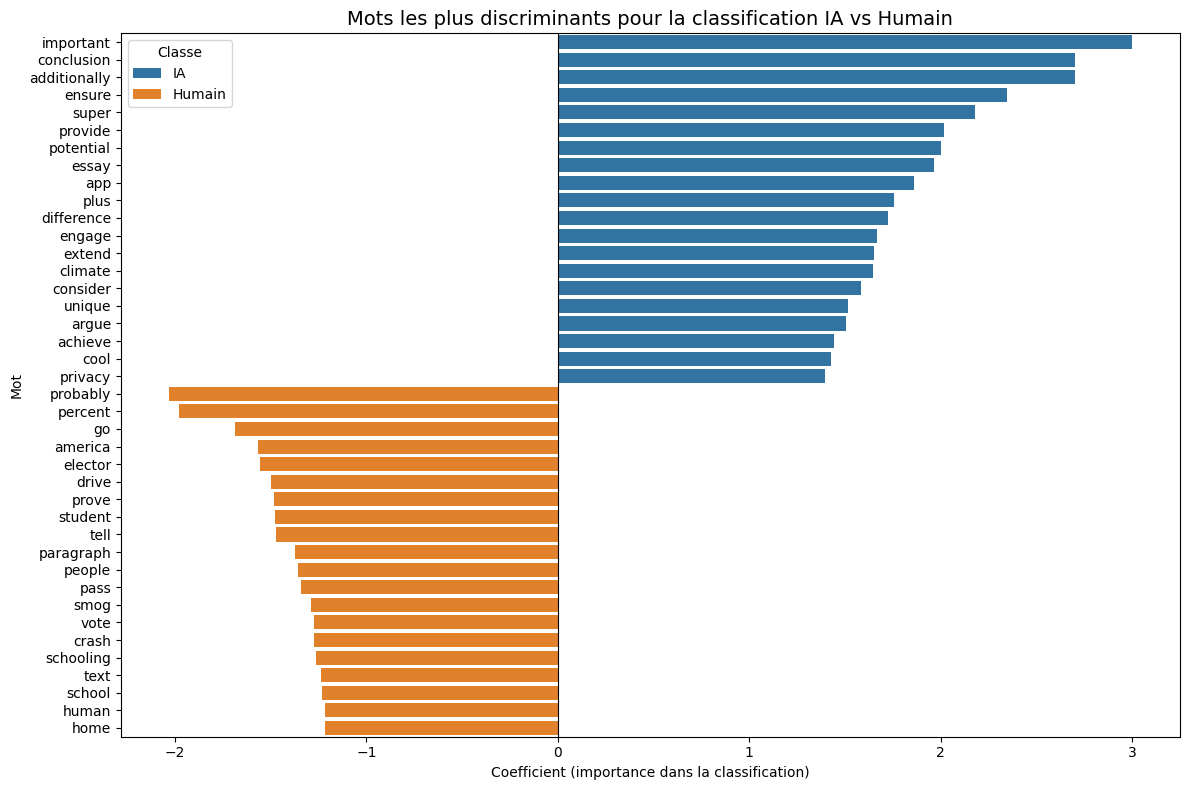

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Créer un DataFrame pour visualisation
top_words = [(feature_names[i], coef[i], 'IA') for i in top_IA] + \
            [(feature_names[i], coef[i], 'Humain') for i in top_humain]

df_top_words = pd.DataFrame(top_words, columns=['Mot', 'Coefficient', 'Classe'])

# Plot stylisé
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top_words,
    y='Mot', x='Coefficient', hue='Classe',
    dodge=False, palette={'IA': '#1f77b4', 'Humain': '#ff7f0e'}
)
plt.title("Mots les plus discriminants pour la classification IA vs Humain", fontsize=14)
plt.xlabel("Coefficient (importance dans la classification)")
plt.ylabel("Mot")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

- Mots les plus associés aux textes IA :
important, additionally, conclusion, ensure, provide, consider, achieve, argue → évoquent un style formel et structuré, souvent typique de l’IA, qui emploie un registre académique et logique.

essay, potential, unique, privacy, climate → des thèmes génériques et bien structurés souvent générés dans des prompts scolaires.

super, cool, app, plus → donnent une touche de pseudo-enthousiasme ou technologique artificielle.

Cela montre que l'IA tend à utiliser un vocabulaire normé, générique et très "propre", qui semble bien formé mais parfois sur-joué.

- Mots les plus associés aux textes humains :
probably, go, tell, prove, home, people, vote, school, drive → une écriture plus spontanée, incarnée, plus proche de l’oralité ou de l’expérience vécue.

percent, student, america, elector, smog, crash → des références spécifiques, souvent contextuelles et ancrées dans le réel.

Cela indique que les humains parlent de façon moins lissée, avec plus de nuances, d'incertitude et un vocabulaire plus contextuel.